#### 一、封装 Encapsulation
**封装**是指将数据（属性，或者叫字段）和操作数据的方法（行为）捆绑在一起，形成一个独立的对象（类的实例）
> Encapsulation: Bundles an object’s state (fields) and behavior (methods) together, hiding internal implementation details to protect data integrity and reduce coupling.

**实现封装**（Implementation）：通过访问修饰符（private、protected、public）控制成员可见性，使用 getter/setter 提供受控访问。
> How to Implement: Use access modifiers (private, protected, public) to control member visibility and provide controlled access via getters and setters.
> Related Concepts:
> - 数据隐藏 data hiding
> - 只读属性 read-only properties
> - 不变量设计 design of class invariants 

In [ ]:
public class Person{
  private String name 
  // private fields: 用于隐藏实现细节hide implementation
  private int age
  // constructor,initilize name and age
  public Person(String name, int age){
    setName(name)
    // 使用setter而非直接赋值以复用校验逻辑 reuse validation logic
    setAge(age) //same as above
  }
  //public getter for read-only access
  public String getName(){
    return name
  }
  public void setName(String name){
    this.name = name
  }
  public int getAge(){
    return age
  }
  public void setAge(int age){
    this.age = age
  }
}

#### 二、Inheritance 继承
继承允许一个类（子类）继承现有类（父类或者基类）的属性和方法。以提高代码的复用性，建立类之间的层次关系。同时，子类还可以重写或者扩展从父类继承来的属性和方法，从而实现多态。
- 继承（Inheritance）：允许子类继承父类的属性和方法，实现“is-a”关系，促进代码复用和层次化设计。Allows a subclass to inherit properties and methods from a superclass, establishing an “is-a” relationship and promoting code reuse and hierarchical design.

- 关键字 `extends`：在类声明时使用 `class Sub extends Super` 表示继承。  Use `class Sub extends Super` in the class declaration to denote inheritance.

- 方法重写（Override）：子类可以用相同签名的 `@Override` 方法替换父类实现，实现多态 A subclass replaces a superclass’s method by defining an `@Override` method with the same signature, enabling polymorphism.

- `super` 调用：在子类构造器中可使用 `super(...)` 显式调用父类构造器；在方法中可通过 `super.method()` 调用父实现。Use `super(...)` in a subclass constructor to invoke the superclass constructor; use `super.method()` to call the parent’s implementation within a method.

- 构造链（Constructor chaining）：创建子类实例时，先执行父类构造器，再执行子类构造器，保证初始化顺序正确。When instantiating a subclass, the superclass constructor runs first, then the subclass constructor, ensuring correct initialization order.

- 里氏替换原则（LSP）：子类必须能够替换父类且不破坏程序正确性，是安全继承的核心原则。  
  Liskov Substitution Principle (LSP): A subclass must be substitutable for its superclass without breaking program correctness; it’s the core of safe inheritance.

- 抽象类 vs 接口：使用抽象类（`abstract class`）可提供部分实现，接口（`interface`）强调行为协议和多实现。  
  Abstract class vs Interface: Use `abstract class` to provide partial implementations; use `interface` to define behavior contracts and allow multiple implementations.

- 访问控制：父类中 `protected` 成员对子类可见，`private` 成员不可继承但可通过 getter/setter 间接访问。  
  Access ontrol: `protected` members in a superclass are visible to subclasses; `private` members are not inherited but can be accessed indirectly via getters/setters.

In [ ]:
// 父类 
// Superclass
class Animal {
    // 定义 speak 方法
    // define speak() method
    void speak() {
        System.out.println("Animal speaks");
    }
}
// 子类 Dog 继承 Animal 并重写 speak 方法
// Subclass Dog extends Animal and overrides speak()
class Dog extends Animal {
    @Override 
    // 告诉IDE这是一个重写override，被标记的方法必须在superclass或者interface中已有同名同参数的方法
    // 否则编译报错，比如Dog和Cat的speak方法都重写了Animal的speak()
    void speak() {
        System.out.println("Dog barks");
    }
}
// 子类 Cat 继承 Animal 并重写 speak 方法
// Subclass Cat extends Animal and overrides speak()
class Cat extends Animal {
    @Override
    void speak() {
        System.out.println("Cat meows");
    }
}
public class Main {
    public static void main(String[] args) {
        // 父类引用指向子类对象
        // Superclass reference to subclass instance
        Animal a1 = new Dog();
        Animal a2 = new Cat();
        // 多态机制：运行时根据对象的实际类型调用对应的 speak() 方法
        // Polymorphism: dynamic dispatch calls the appropriate speak() at runtime
        a1.speak(); // 输出 "Dog barks"
        a2.speak(); // 输出 "Cat meows"
    }
}

#### 三、Polymorphism多态
- 多态（Polymorphism）：同一接口、不同实现，让同一方法调用在运行时根据对象实际类型执行各自的版本。
Polymorphism: A single interface with multiple implementations, allowing the same method call to execute different behaviors at runtime based on the actual object type.

- 实现方式（How to implement）：通过方法重写（override）和父类引用指向子类对象，再由 JVM 动态绑定（dynamic dispatch）。
Implementation: Achieved via method overriding and using a superclass reference to hold subclass instances, with the JVM performing dynamic dispatch.

- 优点（Benefits）：解耦调用者与实现，方便扩展新类型，无需修改调用代码。
Benefits: Decouples caller from concrete implementations, makes it easy to add new types without changing client code.

In [ ]:
// 代码内容基本类似，所以说继承和多态相辅相成
class Animal {
    void speak() {
        System.out.println("Animal speaks");
    }
}
class Dog extends Animal {
    @Override
    void speak() {
        System.out.println("Dog barks");
    }
}
class Cat extends Animal {
    @Override
    void speak() {
        System.out.println("Cat meows");
    }
}
public class Main {
    public static void main(String[] args) {
        Animal a1 = new Dog();
        Animal a2 = new Cat();
        a1.speak();
        a2.speak();
    }
}


#### 四、为什么Java中要组合少继承？
- 继承适合描述“is-a”的关系，但继承容易导致类之间的强耦合，一旦父类发生改变，子类也要随之改变，违背了开闭原则（尽量不修改现有代码，而是添加新的代码来实现）。
- 组合适合描述“has-a”或“can-do”的关系，通过在类中组合其他类，能够更灵活地扩展功能。组合避免了复杂的类继承体系，同时遵循了开闭原则和松耦合的设计原则。

耦合度高 vs 松耦合 High Coupling vs Loose Coupling
> 继承（Inheritance）会在编译期把子类和父类绑定在一起，一旦父类发生改变，所有子类都可能受影响Inheritance creates a compile-time binding between subclass and superclass—changes in the parent can ripple through all children.

脆弱基类问题（Fragile Base Class） 
> 父类修改容易破坏子类行为，违背开闭原则（Open–Closed Principle）Modifying a base class can unintentionally break subclass behavior, violating OCP.

单一职责 vs 职责清晰 Single Responsibility vs Clear Separation
> 继承往往把很多行为都塞到父类里，子类被迫承载不相关功能；组合（Composition）只把需要的功能“拿来用”，每个类职责更清晰 Inheritance can lump unrelated responsibilities into one hierarchy; composition pulls in only needed behaviors via delegation.

灵活扩展 vs 类爆炸 Flexible Extension vs Class Explosion
> 继承每增加一个维度就要新建子类（如 RedCircle、GreenCircle），类会呈指数增长；组合把“形状”和“颜色”分开，只需在运行时注入不同实现 Inheritance leads to combinatorial subclass explosion (RedCircle, GreenCircle, etc.); composition separates concerns (Shape + Color) for runtime flexibility.

运行期动态 vs 编译期静态 Runtime Flexibility vs Compile-time Static
> 组合可以在运行时注入不同实现（依赖注入、策略模式），更适合变化频繁的场景；继承只能在编译期确定 Composition allows dynamic behavior injection (Dependency Injection, Strategy); inheritance is fixed at compile time

In [ ]:
//继承导致的强耦合
// 父类：计算器，提供加与减功能
public class Calculator {
    // 提供加法
    public int add(int a, int b) {
        return a + b;
    }
    // 提供减法
    public int subtract(int a, int b) {
        return a - b;
    }
}
// 子类：科学计算器，继承 Calculator 并添加乘法功能
public class ScientificCalculator extends Calculator {
    // 继承了 add() 与 subtract()
    public int multiply(int a, int b) {
        return a * b;
    }
}
// 客户端使用
public class Main {
    public static void main(String[] args) {
        ScientificCalculator calc = new ScientificCalculator();
        System.out.println(calc.add(2, 3));        // 5
        System.out.println(calc.subtract(5, 1));   // 4
        System.out.println(calc.multiply(2, 4));   // 8
    }
}
// ---- 假设后期  Calculator 中改了 subtract 的逻辑，把参数顺序颠倒了， 比如：-----------
public class Calculator {
    public int add(int a, int b) {
        return a + b;
    }
    // 不小心把参数反了
    public int subtract(int a, int b) {
        return b - a;
    }
}
// 此时 ScientificCalculator 完全不知道 subtract 的内部实现变了，仍然调用就出现了静默错误，既没有编译错误也没有异常抛出，但业务结果彻底错了。
System.out.println(calc.subtract(5, 1)); // 结果变成 1 - 5 = -4，和原本预期 4 相反


##### 4.1 强耦合的表现
1. 子类对父类实现细节一无所知： 子类直接复用了父类方法，一旦父类修正、优化或重构，子类行为也会随之改变。
2. 无法单独测试父类功能： 子类测试时若不关注父类变化，会埋下逻辑缺陷。
3. 修改父类需同步考虑所有子类： 父类改动必须审视、测试每一个子类，否则会引发大量回归问题。
4. 违背开闭原则： 父类本应“对修改关闭”，但为了兼容子类，往往被迫不断改动。

##### 4.2 规避方法
1. 组合优于继承：把 Calculator 作为字段注入到 ScientificCalculator，明确“has-a”关系，调用时只保留稳定接口。
2. 依赖接口而非具体类：定义 ICalculator 接口，Calculator 实现它，子类通过接口引用使用；父类改动不会直接破坏接口契约。

In [ ]:
public interface ICalculator {
    int add(int a, int b);
    int subtract(int a, int b);
}
public class Calculator implements ICalculator { ... }
public class ScientificCalculator {
    private final ICalculator calc;
    public ScientificCalculator(ICalculator calc) {
        this.calc = calc;
    }
    public int multiply(int a, int b) { return a * b; }
    public int add(int a, int b)     { return calc.add(a, b); }
    public int subtract(int a, int b){ return calc.subtract(a, b); }
}


##### 4.3 `extends`和`implement`的区别

extends：类与类之间的继承，用于复用父类的实现，建立“is-a”关系 Inheritance between classes, used to reuse a superclass’s implementation and establish an “is-a” relationship.

implements：类与接口之间的实现，用于遵守接口契约，关注行为而非具体实现 Class-to-interface implementation, used to adhere to an interface contract, focusing on behavior rather than concrete implementation.

单继承 vs 多实现：Java 类只能 extends 一个父类，却可以 implements 多个接口 Single Inheritance vs Multiple Implementation: A Java class can extends only one superclass but can implements multiple interfaces.

耦合度对比：extends 带来较高耦合，父类改动会影响所有子类；implements 更松耦合，可自由切换不同实现 Coupling Comparison: extends introduces higher coupling—changes in the superclass affect all subclasses; implements offers looser coupling, allowing swapping of implementations freely.

Java 8+ 接口增强：接口可定义 default 和 static 方法，接口不再只是纯抽象，implements 复用能力增强 Java 8+ Interface Enhancements: Interfaces can now define default and static methods, so they’re no longer purely abstract—implements gains stronger reuse capabilities.

现代设计趋势：少用 extends（避免脆弱基类），多用 implements 与组合/依赖注入实现灵活可扩展 Modern Design Trend: Favor implements with composition and dependency injection for flexible extensibility, and minimize extends to avoid fragile base classes.

In [ ]:
// 继承实例 容易导致强耦合
// 定义一个父类：引擎类 Engine
class Engine {
    void start() {
        System.out.println("Engine started"); // 启动引擎
    }

    void stop() {
        System.out.println("Engine stopped"); // 停止引擎
    }
}
// 定义一个子类：汽车类 Car 继承了引擎，但是逻辑上应该是汽车拥有引擎
class Car extends Engine {
    void drive() {
        System.out.println("Car is driving"); // 开车
    }
}
// 测试类
public class Main {
    public static void main(String[] args) {
        Car car = new Car();    // 创建汽车对象
        car.start();            // 汽车对象可以直接调用引擎的方法
        car.drive();            // 汽车自己独有的方法
        car.stop();             // 汽车对象也可以调用引擎的方法
    }
}

继承的问题（Problem with Inheritance）
- Car暴露了Engine所有的start()、stop()细节。
- 真实世界中汽车是由引擎组成，不是继承引擎。
- 父类一旦变化（比如 Engine 新增了别的方法），子类不得不也跟着修改，产生维护困难。
- 强耦合（tight coupling），灵活性差。

In [ ]:
// 正确做法
// 定义一个引擎类 Engine
class Engine {
    void start() {
        System.out.println("Engine started"); // 启动引擎
    }
    void stop() {
        System.out.println("Engine stopped"); // 停止引擎
    }
}
// 定义一个汽车类 Car，通过组合持有一个 Engine 对象
class Car {
    private final Engine engine; // Car 拥有一个 Engine （组合关系）
    // 通过构造函数注入引擎对象
    Car(Engine engine) {
        this.engine = engine;
    }

    // 定义开车方法，只暴露需要的行为
    void drive() {
        engine.start();          // 开车前启动引擎
        System.out.println("Car is driving"); // 行驶中
        engine.stop();           // 行驶后关闭引擎
    }
}
// 测试类
public class Main {
    public static void main(String[] args) {
        Engine engine = new Engine(); // 创建引擎对象
        Car car = new Car(engine);    // 创建汽车对象，并注入引擎
        car.drive();                  // 只需要关心 drive 方法，不需要了解引擎细节
    }
}

组合的优势（Advantages of Composition）
- Car没有直接继承Engine，而是持有一个Engine对象（has-a关系）。
- 只暴露需要的方法（drive），隐藏了内部实现细节。
- 可以灵活替换引擎（比如换成 ElectricEngine，不动Car代码）。
- 满足单一职责原则（SRP）、开闭原则（OCP）。
- 低耦合（loose coupling），未来维护和扩展非常容易。

#### 五、多态的实现原理
**多态**指同一个接口或方法在不同的类中有不同的实现，比如说动态绑定，父类引用指向子类对象，方法的具体调用会延迟到运行时决定。

同一套调用代码（比如parent.write()），根据对象真实的类型，执行不同的具体实现。

编译时看的是父类，运行时执行的是子类。
- 在编译 compile 阶段，编译器只知道parent是Parent类型，有一个write()方法，不会去管具体对象是谁。
- JVM通过动态绑定（Dynamic Binding），在运行时判断对象的真实类型，然后执行实际的方法。

多态的实现原理
- 每一个类（不是对象）在加载时，都会建立一张虚方法表。
- 表中存的是该类能调用的所有方法的地址。
- 当调用一个方法时，程序根据对象的实际类型，走虚方法表指向的方法地址，找到具体的方法执行。
简单理解
- new Parent()：对象的 vtable 指向 Parent 的 write()。
- new Child()：对象的 vtable 指向 Child 重写的 write()。
- JVM在运行时根据对象真实类型查vtable，从而正确跳转。

In [ ]:
// 定义一个父类 Parent
class Parent {
    // 定义一个普通方法 write
    public void write() {
        // 输出 Parent 类的 write 方法内容
        System.out.println("Parent");
    }
}
// 定义一个子类 Child 继承自 Parent
class Child extends Parent {
    // 使用 @Override 明确覆盖父类的方法
    @Override
    public void write() {
        // 输出 Child 类中覆盖后的 write 方法内容
        System.out.println("Child");
    }
}
// 测试类 Main
public class Main {
    public static void main(String[] args) {
        // 多态的体现：
        // 父类类型的数组 parents，同时包含父类和子类对象
        Parent[] parents = {
            new Parent(),     // 实例化父类对象
            new Child()       // 实例化子类对象（但类型仍是 Parent）
        };
        // 遍历数组，调用 write 方法
        for (Parent parent : parents) {
            // 多态关键点：这里变量类型是 Parent
            // 但是实际调用的是对象的真实类型的方法（动态绑定）
            parent.write();
            // 第一次循环输出：Parent.write() -> 输出 "Parent"
            // 第二次循环输出：Child.write() -> 输出 "Child"
        }
    }
}


#### 六、解释重载Overload和重写Override的区别
> 如果一个类有多个名字相同但参数个数不同的方法，我们通常称这些方法为方法重载（overload）。如果方法的功能是一样的，但参数不同，使用相同的名字可以提高程序的可读性。
> 如果子类具有和父类一样的方法（参数相同、返回类型相同、方法名相同，但方法体可能不同），我们称之为方法重写（override）。方法重写用于提供父类已经声明的方法的特殊实现，是实现多态的基础条件

##### 1. 概念对比 | Concept Comparison

- **方法重载（Overload）**：同一个类中，方法名相同，但**参数列表不同**（数量不同、类型不同或顺序不同）。In the same class, methods share the same name but have **different parameter lists** (different number, types, or order of parameters).

- **方法重写（Override）**：子类中重新定义父类已有的方法，**方法名、参数列表、返回类型必须一致**，方法体可以不同。In a subclass, redefines an existing method from the parent class with **the same name, parameter list, and return type**, but a different method body.

##### 2. 发生位置 | Where It Happens

- **重载（Overload）**：发生在**同一个类**内部。
- **Overloading**: Happens **within the same class**.

- **重写（Override）**：发生在**父类与子类之间**。
- **Overriding**: Happens **between parent class and subclass**.


##### 3. 参数要求 | Parameter Requirements

- **重载（Overload）**：**参数个数或类型**必须不同。**Parameter number or types** must differ.

- **重写（Override）**：**参数必须完全一致**（包括顺序和类型） **Parameters must be exactly the same** (including order and types).



##### 4. 返回值要求 | Return Type Requirements

- **重载（Overload）**：返回类型可以相同，也可以不同。Return type can be the same or different.

- **重写（Override）**：返回类型必须与父类方法相同（或是父类返回类型的子类型，称为协变返回 Covariant Return）。Return type must be the same as or a subtype of the parent method (Covariant Return allowed).

##### 5. 访问修饰符要求 | Access Modifier Requirements

- **重载（Overload）**：访问修饰符（如 public/private/protected）没有强制要求。 No strict rules for access modifiers.

- **重写（Override）**：子类方法的访问权限**不能更严格**（比如父类是 public，子类不能是 private）。Subclass method's access level **cannot be more restrictive** than that of the parent class.

##### 6. 异常处理要求 | Exception Handling

- **重载（Overload）**：异常处理没有特别限制。No special restrictions on exceptions.

- **重写（Override）**：子类抛出的异常不能超过父类方法声明的异常范围（受检异常 Checked Exceptions 限制）。Subclass cannot throw broader checked exceptions than the parent class declares.

##### 7. 是否与多态有关 | Relation to Polymorphism

- **重载（Overload）**：**与多态无关**，是编译时确定的方法调用（静态绑定 Static Binding）。**Not related to polymorphism**, method call is determined at compile time (Static Binding).

- **重写（Override）**：**与多态直接相关**，是运行时确定的方法调用（动态绑定 Dynamic Binding）。 **Directly related to polymorphism**, method call is determined at runtime (Dynamic Binding).


##### 8. 示例对比 | Code Example

In [ ]:

// 方法重载：同类中方法名相同，参数不同
public class ExampleOverload {
    public void sayHello() {
        System.out.println("Hello");
    }
    public void sayHello(String name) {
        System.out.println("Hello, " + name);
    }
    public void sayHello(String name, int age) {
        System.out.println("Hello, " + name + ", you are " + age + " years old.");
    }
}

In [ ]:
//方法重写 Overriding 示例
// 方法重写：子类中重写父类的方法
class Animal {
    public void sound() {
        System.out.println("Animal makes a sound");
    }
}
class Dog extends Animal {
    @Override // 标明这是重写
    public void sound() {
        System.out.println("Dog barks");
    }
}

##### 9. 总结总结 | Key Summary

| 项目 Item         | 方法重载 Overloading           | 方法重写 Overriding             |
|--------------------|---------------------------------|---------------------------------|
| 发生位置 Location   | 同一个类 Same class             | 父类和子类 Parent & Subclass    |
| 参数 Parameters     | 必须不同 Must differ            | 必须相同 Must be identical      |
| 返回值 Return Type  | 无强制要求 No strict rule       | 必须兼容 Must match/subtype     |
| 访问修饰符 Access   | 无要求 No rule                  | 子类权限不能更小 Subclass ≥ Parent |
| 关联多态 Polymorphism | 无 Not related                 | 直接相关 Directly related        |

---

##### 10. 延伸理解 | Extended Understanding
1. 重载 Overload 主要是为了**代码可读性**
  - 统一行为的不同输入场景即提高方法可读性和统一接口。Overloading mainly improves **code readability**, handling different input scenarios for the same behavior.
  - 允许通过不同参数初始化对象，提供灵活的对象创建方式 Allow flexible object creation by providing different parameter options.
  - 创建静态工具类，根据不同输入统一提供一个方法名处理各种情况 这样不需要记一堆方法名比如`isEmptyString,isEmptyList,isEmptyMap`，统一方法使用体验
  - 泛型和模版设计 Generic & Template Method Design : 重载和泛型一起使用可以设计更灵活的通用模版方法 


      ```java
      public <T> void print(T data) {
          System.out.println(data);
      }
      public void print(int data) {
          System.out.println("int: " + data);
      }
      ```
      

2. 重写 Override 是**多态（Polymorphism）**的基础，让不同子类根据需要实现不同的功能。Overriding is the **foundation of polymorphism**, allowing subclasses to define specialized behavior.

3. 注意和补充
  - 如果方法语义不统一，强行重载会导致接口歧义。
  - 参数数量过多（比如超过5个以上不同重载），需要考虑引入Builder 模式。
  - 命名不要偷懒，如果本质行为不同，应当使用不同的方法名。

#### 七、SOLID OOD原则
1. 单一职责原则（Single Responsibility Principle, SRP），指一个类应该只有一个引起它变化的原因，即一个类只负责一项职责。这样做的目的是使类更加清晰，更容易理解和维护。
2. 开闭原则（Open-Closed Principle, OCP），指软件实体应该对扩展开放，对修改关闭。这意味着一个类应该通过扩展来实现新的功能，而不是通过修改已有的代码来实现。
- 举例说明开闭原则
```java
// 如下方法违反了开闭原则
// 1. 修改频繁：每新增一种Shape都必须修改draw()方法
// 2. instanceof 暴露了类的具体类型，违背多态封装思想，耦合紧密
// 3. ShapeDrawer 本应只负责“画图”，却要了解具体“形状逻辑”，职责混杂
    class ShapeDrawer {
        public void draw(Shape shape) {
            if (shape instanceof Circle) {
                drawCircle((Circle) shape);
            } else if (shape instanceof Rectangle) {
                drawRectangle((Rectangle) shape);
            }
        }
        private void drawCircle(Circle circle) {
                // 画圆形
            }
        private void drawRectangle(Rectangle rectangle) {
            // 画矩形
        }
      }
        // 如下是符合开闭原则的
        // 1. 想要增加新形状只要新增一个类,实现 draw() 方法即可，无需动现有代码
        // 2. 对修改关闭	ShapeDrawer 不用再动，只关心 Shape 抽象类接口
        // 3. 符合多态原则	利用子类重写 draw()，运行时自动决定行为（动态绑定）
        // 4. 职责清晰	“绘制逻辑”由各个 Shape 自己实现， ShapeDrawer 只负责调用

        abstract class Shape {
            public abstract void draw();
        }
        class Circle extends Shape {
            @Override
            public void draw() {
                // 画圆形
            }
        }
        class Rectangle extends Shape {
            @Override
            public void draw() {
                // 画矩形
            }
        }
        class ShapeDrawer {
            public void draw(Shape shape) {
                shape.draw();  // 多态：调用子类自己的实现
            }
        }
```
> 以上案例同样满足OOD核心原则，并不是说abstract class就不满足，并且他满足的原则分别是
> 1. 开闭原则OCP： 新增形状只需新增一个子类并实现draw(), 不需要改原油代码
> 2. 里氏替换原则LSP: 所有shape子类都可以作为Shape被使用，比如传给shapeDrawer.draw()
> 3. 父类Shape引用可以指向任何具体的子类并在运行时动态决定调用哪一个draw()
> 一般我们更推荐interface而不是abstract class是因为 java中类只能继承一个父类

1. 里氏替换原则(LSP),其规定任何父类可以出现的地方，子类也一定可以出现。子类在扩展父类时，不应改变父类原有的行为。例如，如果有一个方法接受一个父类对象作为参数，那么传入该方法的任何子类对象也应该能正常工作。
2. 接口隔离原则（Interface Segregation Principle, ISP），指客户端不应该依赖它不需要的接口。这意味着设计接口时应该尽量精简，不应该设计臃肿庞大的接口。
3. 依赖倒置原则（Dependency Inversion Principle, DIP），指高层模块不应该依赖低层模块，二者都应该依赖其抽象；抽象不应该依赖细节，细节应该依赖抽象。这意味着设计时应该尽量依赖接口或抽象类，而不是实现类。

#### 八、访问修饰符 public、private、protected、以及默认时的区别？
Java 中，可以使用访问控制符来保护对类、变量、方法和构造方法的访问。Java 支持 4 种不同的访问权限。
- default （即默认，什么也不写）: 在同一包内可见，不使用任何修饰符。可以修饰在类、接口、变量、方法。
- private : 仅在同一类内可见。可以修饰变量、方法。注意：不能修饰类（外部类）
- public : 对所有类可见。可以修饰类、接口、变量、方法
- protected : 对同一包内的类以及所有继承父类的子类可见。可以修饰变量、方法。注意：不能修饰类（外部类）。

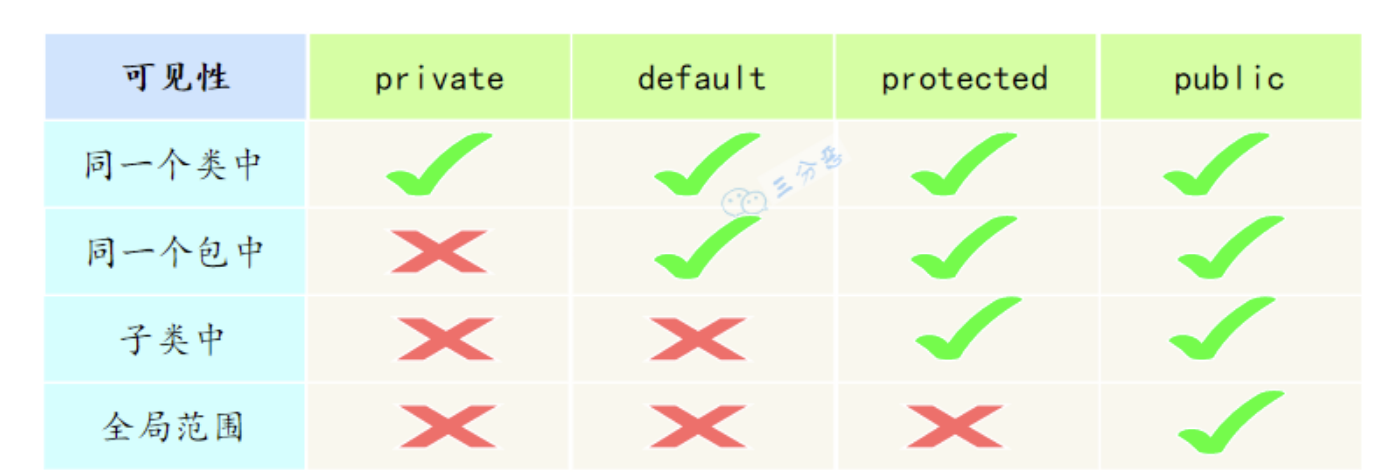

#### 九、`this`关键字的作用
this 是自身的一个对象，代表对象本身，可以理解为：指向对象本身的一个指针。

this 的用法在 Java 中大体可以分为 3 种：
- 普通的直接引用，this 相当于是指向当前对象本身
  - this代表当前instance object的引用，可以访问当前对象的属性和方法
  - 可以省略，但在链式调用或者区分变量时常用
---
  ``` java
  public class Person {
    String name;
    public void printName() {
        System.out.println(this.name); // this 指向当前对象，可以写成 name，但 this 更明确
    }
  }
  ```
---
- 形参与成员变量名字重名，用 this 来区分
  - 当构造函数的参数名和成员变量重名时，使用`this.成员变量`来避免混淆
  - 如果不加this，变量会引用形参而不是成员变量
---
  ```java
  public class Person {
    String name;
    public Person(String name) {
        this.name = name;  // 左边是成员变量，右边是构造函数的参数
        //若不使用 this.name = name;，name = name; 只是局部赋值，不会修改成员变量。
    }
  }
  ```
---
- 引用本类的构造方法
  - 在构造函数内部调用另一个同类的构造方法（重载），必须放在构造方法的第一行。
  - 用于构造方法间的复用，避免代码重复。
---
  ``` java
  public class Person {
    String name;
    int age;
    // 构造方法1
    public Person(String name) {
        this(name, 0); // 调用另一个构造方法
    }
    // 构造方法2
    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }
  }
  ```
